In [ ]:
import requests
from datetime import datetime

In [ ]:
iniDate = str(datetime(2016, 1, 25, 0, 0).timestamp())[:-2]
endDate = str(datetime(2020, 5, 25, 0, 0).timestamp())[:-2]
stockID = '3231'
interval = '1d'

print(iniDate)
print(endDate)
url = "https://query1.finance.yahoo.com/v8/finance/chart/{}.TW?period1={}&period2={}&interval={}".format(stockID, iniDate, endDate, interval)

res = requests.get(url)
print(res.text)

1453680000
1590364800
{"chart":{"result":[{"meta":{"currency":"TWD","symbol":"3231.TW","exchangeName":"TAI","instrumentType":"EQUITY","firstTradeDate":1061254800,"regularMarketTime":1592371806,"gmtoffset":28800,"timezone":"CST","exchangeTimezoneName":"Asia/Taipei","regularMarketPrice":32.25,"chartPreviousClose":15.803,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"CST","start":1592355600,"end":1592355600,"gmtoffset":28800},"regular":{"timezone":"CST","start":1592355600,"end":1592371800,"gmtoffset":28800},"post":{"timezone":"CST","start":1592371800,"end":1592371800,"gmtoffset":28800}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[1453683600,1453770000,1453856400,1453942800,1454029200,1454115600,1454288400,1454374800,1454461200,1455498000,1455584400,1455670800,1455757200,1455843600,1456102800,1456189200,1456275600,1456362000,1456448400,1456794000,1456880400,1456966800,1457053200,1457312400,1457398800

In [ ]:
import pandas as pd
import numpy as np
import json
import math

data = json.loads(res.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df = df[['open','high','low', 'close']]
df.columns = ['Open', 'High', 'Low', 'Close']
col = df.columns
df[col] = df[col].apply(lambda x:0 if math.isnan(x))
df[col] = df[col].apply(pd.to_numeric)

df.tail()

,Open,High,Low,Close
2020-05-18 01:00:00,27.950001,28.00,27.450001,27.549999
2020-05-19 01:00:00,28.100000,28.35,27.799999,28.299999
2020-05-20 01:00:00,28.500000,28.60,28.150000,28.150000
2020-05-21 01:00:00,28.400000,28.50,28.200001,28.350000
2020-05-22 01:00:00,28.400000,28.40,28.049999,28.400000


> ## backtest

In [ ]:
!pip install backtesting
!pip install backtrader

     |████████████████████████████████| 163kB 2.8MB/s 
  Created wheel for backtesting: filename=Backtesting-0.1.7-cp36-none-any.whl size=158342 sha256=b678fad9ae63ed00f0cf4a9b5be581371cc19e7f1bbdfcf65fe13d7cc0c7e268
  Stored in directory: /root/.cache/pip/wheels/92/8e/e9/7967f819d04dff0b8fefcb00bda4bc6a326cbd40d9c81d88d7
Successfully built backtesting
     |████████████████████████████████| 419kB 2.8MB/s 


In [ ]:
from backtesting import Backtest
from backtesting.lib import SignalStrategy
import pandas as pd

class Strategy(SignalStrategy):
    
    n1 = 1
    n2 = 60
    
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close =  pd.Series(self.data.Close)
        sma1 = close.rolling(self.n1).mean()
        sma2 = close.rolling(self.n2).mean()

        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        # signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
        
        # combine signal
        signal = signal_long
        # signal[signal_short] = -1
        
        # add signal
        self.set_signal(signal)

df = df.dropna()
bt = Backtest(df, Strategy)
result1 = bt.run()
bt.plot()

/usr/local/lib/python3.6/dist-packages/backtesting/_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.


In [ ]:
result2 = bt.optimize(n1=range(5, 100, 5),
                      n2=range(5, 100, 5))
bt.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Searching best of 361 configurations.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  This is separate from the ipykernel package so we can avoid doing imports until


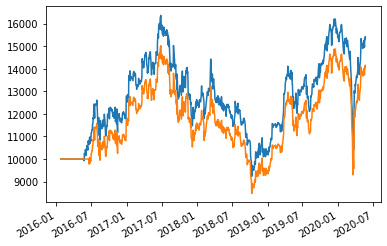

In [ ]:
result1._trade_data.Equity.plot()
result2._trade_data.Equity.plot()


In [ ]:
print(result2.loc['_strategy'])

Strategy(n1=90,n2=60)
